# Projeto COVID-19

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima


## Importando dados para o projeto

In [3]:
df1 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2020_Parte1_14out2022.csv', error_bad_lines=False, sep=";")
df2 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2020_Parte2_14out2022.csv', error_bad_lines=False, sep=";")
df3 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2021_Parte1_14out2022.csv', error_bad_lines=False, sep=";")
df4 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2021_Parte2_14out2022.csv', error_bad_lines=False, sep=";")
df5 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2022_Parte1_14out2022.csv', error_bad_lines=False, sep=";")
df6 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2022_Parte2_14out2022.csv', error_bad_lines=False, sep=";")

C:\Users\Natanael\AppData\Local\Temp\ipykernel_10408\2998472614.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2020_Parte1_14out2022.csv', error_bad_lines=False, sep=";")
C:\Users\Natanael\AppData\Local\Temp\ipykernel_10408\2998472614.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-BH/COVID-19/HIST_PAINEL_COVIDBR_2020_Parte2_14out2022.csv', error_bad_lines=False, sep=";")
C:\Users\Natanael\AppData\Local\Temp\ipykernel_10408\2998472614.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df3 = pd.read_csv('C:/Users/Natanael/Desktop/BOOTCAMP_UNIMED-

## Juntando os arquivos em um só

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6])


In [5]:
df["data"] = pd.to_datetime(df["data"])

### Criando colunas de Dia, Mês e Ano

In [6]:
df["ano"], df["mes"], df["dia"] = (df["data"].dt.year, df["data"].dt.month, df["data"].dt.day)

In [7]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,ano,mes,dia
440330,Sudeste,SP,Cubatão,35,351350.0,35041.0,BAIXADA SANTISTA,2020-05-08,19,130705.0,72.0,20,4,0,NaN,NaN,0.0,2020,5,8
606289,Sudeste,SP,Arco-Íris,35,350335.0,35095.0,TUPA,2021-05-01,17,1791.0,89.0,0,6,0,NaN,NaN,0.0,2021,5,1
983987,Centro-Oeste,GO,Cidade Ocidental,52,520549.0,52004.0,ENTORNO SUL,2021-03-13,10,71376.0,4450.0,3,56,0,NaN,NaN,0.0,2021,3,13
972670,Centro-Oeste,GO,Abadiânia,52,520010.0,52011.0,PIRINEUS,2021-06-07,23,20042.0,412.0,0,28,0,NaN,NaN,0.0,2021,6,7
252777,Nordeste,PB,Mato Grosso,25,250937.0,25008.0,8ª REGIAO,2021-04-12,15,2908.0,36.0,2,1,0,NaN,NaN,0.0,2021,4,12
65591,Nordeste,MA,Paulo Ramos,21,210810.0,21002.0,BACABAL,2022-09-22,38,21040.0,1265.0,0,39,2,NaN,NaN,0.0,2022,9,22
307230,Sudeste,MG,Canápolis,31,311180.0,31073.0,ITUIUTABA,2020-05-04,19,12150.0,0.0,0,0,0,NaN,NaN,0.0,2020,5,4
319744,Nordeste,AL,Porto Calvo,27,270730.0,27002.0,2ª REGIAO DE SAUDE,2021-04-09,14,27165.0,980.0,0,24,0,NaN,NaN,0.0,2021,4,9
758010,Sul,PR,Ivaiporã,41,411150.0,41022.0,22ª RS IVAIPORA,2021-10-23,42,31984.0,3904.0,6,96,0,NaN,NaN,0.0,2021,10,23
863331,Sul,RS,Coronel Barros,43,430587.0,43013.0,REGIAO 13,2022-05-23,21,2519.0,919.0,0,5,0,NaN,NaN,0.0,2022,5,23


## Conferindo os tipos ou classes dos dados

In [8]:
df.dtypes

regiao                            object
estado                            object
municipio                         object
coduf                              int64
codmun                           float64
codRegiaoSaude                   float64
nomeRegiaoSaude                   object
data                      datetime64[ns]
semanaEpi                          int64
populacaoTCU2019                 float64
casosAcumulado                   float64
casosNovos                         int64
obitosAcumulado                    int64
obitosNovos                        int64
Recuperadosnovos                 float64
emAcompanhamentoNovos            float64
interior/metropolitana           float64
ano                                int64
mes                                int64
dia                                int64
dtype: object

### Pegando uma amostra dos dados

In [9]:
df.sample

<bound method NDFrame.sample of               regiao estado municipio  coduf    codmun  codRegiaoSaude  \
0             Brasil    NaN       NaN     76       NaN             NaN   
1             Brasil    NaN       NaN     76       NaN             NaN   
2             Brasil    NaN       NaN     76       NaN             NaN   
3             Brasil    NaN       NaN     76       NaN             NaN   
4             Brasil    NaN       NaN     76       NaN             NaN   
...              ...    ...       ...    ...       ...             ...   
595609  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
595610  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
595611  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
595612  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
595613  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   

         nomeRegiaoSaude       data  semanaEpi  populacaoTCU2019  \
0          

### Verificando quantidade de vazios

In [10]:
df.isnull().sum()

regiao                          0
estado                        963
municipio                   46536
coduf                           0
codmun                      26964
codRegiaoSaude              46536
nomeRegiaoSaude             46536
data                            0
semanaEpi                       0
populacaoTCU2019            19572
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          5236814
emAcompanhamentoNovos     5236814
interior/metropolitana      46536
ano                             0
mes                             0
dia                             0
dtype: int64

### Substituindo /, "" no nome da colunas e colocando tudo em minúsculo.

In [11]:
#Não obrigatório, apenas uma boa prática.
def corrigir_colunas(col_name):
    return re.sub(r"[/]","", col_name).lower() #.lowe() deixa tudo em minúscula

In [12]:
df.columns = [corrigir_colunas(col) for col in df.columns]

## Substituindo valores vazios por zero

In [13]:
df["estado"].fillna(0, inplace=True)
df["municipio"].fillna(0, inplace=True)
df["codmun"].fillna(0, inplace=True)
df["codregiaosaude"].fillna(0, inplace=True)
df["nomeregiaosaude"].fillna(0, inplace=True)
df["populacaotcu2019"].fillna(0, inplace=True)
df["recuperadosnovos"].fillna(0, inplace=True)
df["emacompanhamentonovos"].fillna(0, inplace=True)
df["interiormetropolitana"].fillna(0, inplace=True)


In [14]:
df.isnull().sum()

regiao                   0
estado                   0
municipio                0
coduf                    0
codmun                   0
codregiaosaude           0
nomeregiaosaude          0
data                     0
semanaepi                0
populacaotcu2019         0
casosacumulado           0
casosnovos               0
obitosacumulado          0
obitosnovos              0
recuperadosnovos         0
emacompanhamentonovos    0
interiormetropolitana    0
ano                      0
mes                      0
dia                      0
dtype: int64

In [15]:
ceara = df.loc[df["estado"] == "CE"]

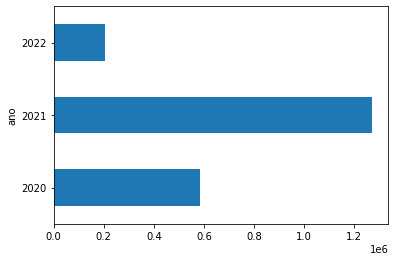

In [16]:
anos = df.groupby(df["ano"])["obitosnovos"].sum().plot.barh();

In [17]:
ceara = df.loc[
    (df.estado == "CE") &
    (df.municipio != 0 ) &
    (df.obitosacumulado > 0)
]

### Filtrando apenas pelo Brasil

In [18]:
brasil = df.loc[df["regiao"] == "Brasil"]

In [19]:
brasil["obitosnovos"].sum()

687144

## Análise com gráficos de linha

In [20]:
px.line(brasil, 'data', 'obitosnovos',
       title='Obitos no Brasil')

In [21]:
px.line(brasil, 'data', 'casosnovos',title='Casos Novos no Brasil')

In [22]:
px.line(brasil, "data", "recuperadosnovos", title='Recuperado da COVID-19 no Brasil' )

In [23]:
from matplotlib.pyplot import title


fig = go.Figure()
fig.add_trace(
    go.Scatter(x = brasil.data, y = brasil.recuperadosnovos, name = "Recuperados",
               mode = 'lines+markers', line = {"color":"red"})
    
)

fig.update_layout(title = "Acumulo de Recuperados da COVID-19 no Barsil")

## Calculando a taxa de crecimento dos casos de COVID-19 no Brasil

In [24]:
from tkinter.messagebox import NO


def taxa_crescimento(data, variable, data_inicio = None, data_fim = None):
    #Se data inicio for None, definir como a primeira data disponível
    if data_inicio == None:
        data_inicio = data.data.loc[data[variable] > 0 ].min()
    else:
        data_inicio = pd.datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.data.iloc[-1]
    else:
        data_fim = pd.datetime(data_fim)
    
    # Definir os valores do presente e passado    
    passado = data.loc[data.data == data_inicio, variable].values[0]
    presente = data.loc[data.data == data_fim, variable].values[0]
    
    #Definir o número de pontos no tempo que serão avaliados 
    n = (data_fim - data_inicio).days
    
    # Calcular taxa
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100



In [25]:
taxa_crescimento(brasil, "casosacumulado")

1.823246844984494

In [26]:
def taxa_crescimento_diario(data, variable, data_inicio = None):
    if data_inicio == None:
        data_inicio = data.data.loc[data[variable] > 0 ].min()
    else:
        data_inicio = pd.datetime(data_inicio)
        
    data_fim = data.data.max()
    
    n = (data_fim - data_inicio).days
    
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas)*100

In [27]:
tx_dia = taxa_crescimento_diario(brasil, "casosacumulado")

C:\Users\Natanael\AppData\Local\Temp\ipykernel_10408\441566143.py:12: RuntimeWarning:

divide by zero encountered in double_scalars



In [28]:
primeiro_dia = brasil.data.loc[brasil.casosacumulado > 0].min()

px.line(x = pd.date_range(primeiro_dia, brasil.data.max())[1:],
        y = tx_dia, title="Taxa de crescimento de casos confirmados no Brasil")

## Predições

In [29]:
confirmados = brasil.casosnovos
confirmados.index = brasil.data
confirmados

data
2020-02-25       0
2020-02-26       1
2020-02-27       0
2020-02-28       0
2020-02-29       1
              ... 
2022-10-10    4682
2022-10-11    7350
2022-10-12    5114
2022-10-13    3212
2022-10-14    6597
Name: casosnovos, Length: 963, dtype: int64

In [30]:
res = seasonal_decompose(confirmados)

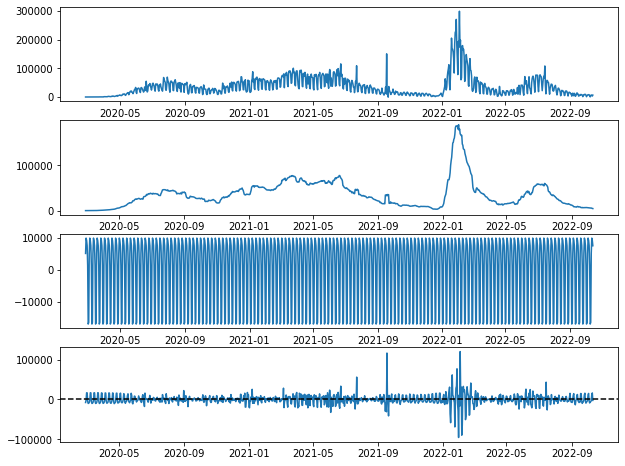

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle = "dashed", c = "black")
plt.show;

# Prenvendo casos de Covid no Brasil

In [32]:
modelo = auto_arima(confirmados)

In [33]:
from operator import index
from matplotlib.figure import Figure


fig = go.Figure(go.Scatter(
             x  = confirmados.index, y = confirmados, name = "Observados"
             ))

fig.add_trace(go.Scatter(
    x = confirmados.index, y = modelo.predict_in_sample(), name = "preditos"
))

fig.add_trace(go.Scatter(
    x = pd.date_range('14/10/2022', '31/10/2022'), y = modelo.predict(17), name = 'Forecast'
))

fig.update_layout(title = 'Previsão de casos confirmados no Brasil para os próximos 17 dia')
fig.show()

c:\Users\Natanael\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: UserWarning:

Parsing '14/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\Natanael\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: UserWarning:

Parsing '31/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

